In [1]:
import numpy as np
import pandas as pd
from scipy.stats import ortho_group
from procrustes import orthogonal
from procrustes import orthogonal_2sided
import cv2 as cv2
import matplotlib.pyplot as plt

In [17]:
# the two original triangles for future use
T1=np.array([[0,1],
           [1,-1],
           [-1,-1]])
T2=np.array([[1.55, 0.82],
            [3.10, -0.72],
            [1.07, -1.65]])

In [18]:
T1, T2

(array([[ 0,  1],
        [ 1, -1],
        [-1, -1]]),
 array([[ 1.55,  0.82],
        [ 3.1 , -0.72],
        [ 1.07, -1.65]]))

In [13]:
s = np.array([[2, 0.5],
              [2, -0.5]])

In [80]:
# s2 = np.concatenate([s2, np.zeros((len(s1)-len(s2),2))])

In [81]:
# pts1 = np.concatenate([pts_img1, s1])
# pts2 = np.concatenate([pts_img2, s2])

In [83]:
# len(pts1),len(s1),len(pts_img1)
# w2 = np.zeros((len(s1),1)).squeeze()
# w1 = np.ones((len(pts_img1),1)).squeeze()
# w = np.concatenate([w1, w2])

In [7]:
# w

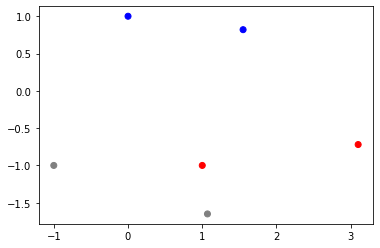

In [19]:
plt.scatter(T1[:,0], T1[:,1], c = ['blue', 'red', 'grey'])
plt.scatter(T2[:,0], T2[:,1], c = ['blue', 'red', 'grey'])
# ax[1].get_gca().invert_yaxis()

In [20]:
# orthogonal Procrustes analysis with translation
# pad_mode = "row"
result = orthogonal(T2, T1, scale=True, translate=True)

In [21]:
result

 error: 0.008361881464286357
 new_a: array([[-0.15400291,  0.5771511 ],
       [ 0.51526208, -0.08779605],
       [-0.36125917, -0.48935505]])
 new_b: array([[ 0.        ,  0.6172134 ],
       [ 0.46291005, -0.3086067 ],
       [-0.46291005, -0.3086067 ]])
     s: None
     t: array([[ 0.94403554, -0.32984374],
       [ 0.32984374,  0.94403554]])

In [48]:
rot = result.t
z = np.zeros((2,1))
rot = np.append(rot, z, axis = 1) 
rot = np.append(rot, [[0,0,0]], axis=0)
# rot = np.append(rot, [[0,0,0]], axis = 1)
rot

array([[ 0.94403554, -0.32984374,  0.        ],
       [ 0.32984374,  0.94403554,  0.        ],
       [ 0.        ,  0.        ,  0.        ]])

In [50]:
from scipy.spatial.transform import Rotation   

## first transform the matrix to euler angles
r =  Rotation.from_matrix(rot)
angles = r.as_euler("zyx",degrees=True)
angles

array([25.73329639,  0.        ,  0.        ])

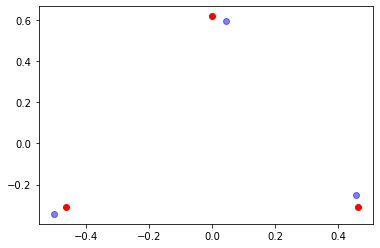

In [26]:
import matplotlib.pyplot as plt
plt.scatter(result.new_b[:,0], result.new_b[:,1], c='red')
plt.scatter(transformed_mat[:,0], transformed_mat[:,1], c= 'blue', alpha = 0.5)

In [66]:
# translate the test matrix wrt to ref matrix
s_trans = s - np.average(T2, axis = 0)
t2_trans = T2 - np.average(T2, axis = 0)

# scale to reference matrix
# scaling factor to match unit sphere
s_scale = s_trans * 1.0 / np.linalg.norm(T2)
t2_scale = t2_trans * 1.0 / np.linalg.norm(T2)

s_final = np.dot(s_scale,result.t)
t2_final = np.dot(t2_scale,result.t)

In [67]:
s

array([[ 2. ,  0.5],
       [ 2. , -0.5]])

In [68]:
t2_final

array([[ 0.02521622,  0.33388557],
       [ 0.25642918, -0.14172656],
       [-0.28164541, -0.19215901]])

In [83]:
# compute distance between the two points before and after transformation

dist_s_pt1 = np.sqrt((s[0,0]-T2[0,0])**2 + (s[0,1]-T2[0,1])**2) 
dist_s_pt2 = np.sqrt((s[0,0]-s[1,0])**2 + (s[0,1]-s[1,1])**2)
dist_ratio_before = dist_s_pt1/dist_s_pt2

dist_s_final_pt1 = np.sqrt((s_final[0,0] - t2_final[0,0])**2 + (s_final[0,1] - t2_final[0,1])**2)
dist_s_final_pt2 = np.sqrt((s_final[0,0] - s_final[1,0])**2 + (s_final[0,1] - s_final[1,1])**2)
dist_ratio_after = dist_s_final_pt1/dist_s_final_pt2

In [84]:
dist_s_final_pt1

0.13364510209960032

In [85]:
print(dist_ratio_before), print(dist_ratio_after)

0.5521775076911409
0.5521775076911405


(None, None)